In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

**Selecting the databases**

In [20]:
with_mask_files = os.listdir('data/with_mask/')
print(with_mask_files[0:5])
without_mask_files = os.listdir('data/without_mask/')

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']


In [21]:
print("Number of datasets with mask imgaes:",len(with_mask_files))
print("Number of datasets without mask imgaes:",len(without_mask_files))

Number of datasets with mask imgaes: 3725
Number of datasets without mask imgaes: 3828


**Create Labels for the images**

with mask --> 1<br>
wihtout mask --> 0

In [22]:
with_mask_labels = [1]*len(with_mask_files)
without_mask_labels = [0]*len(without_mask_files)

In [23]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [24]:
labels = with_mask_labels + without_mask_labels
print(labels[0:5])
print(labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the images**

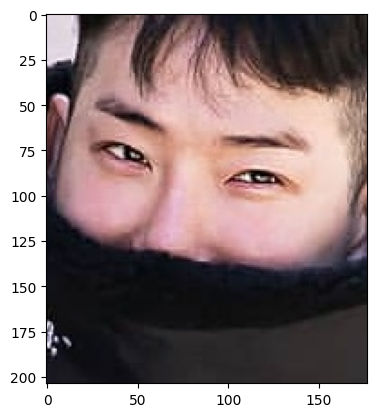

In [25]:
img = mpimg.imread("data/with_mask/with_mask_11.jpg")
imgplot = plt.imshow(img)
plt.show()

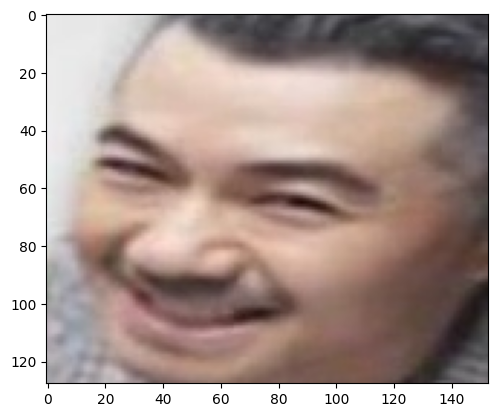

In [26]:
img = mpimg.imread("data/without_mask/without_mask_200.jpg")
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Reisze the images<br>
2. Convert the images to numpy arrays

In [27]:
#convert images to numpy arrays
data = []

with_mask_path = 'data/with_mask/'


for img_file in with_mask_files:
    image = Image.open(with_mask_path+img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

without_mask_path = 'data/without_mask/'

for img_file in without_mask_files:
    image = Image.open(without_mask_path+img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [28]:
len(data)

7553

In [29]:
type(data)

list

In [30]:
data[0]

array([[[50, 58, 31],
        [46, 55, 33],
        [56, 58, 42],
        ...,
        [27, 32, 25],
        [29, 33, 19],
        [33, 40, 17]],

       [[47, 54, 30],
        [49, 58, 36],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [37, 42, 31],
        [31, 41, 23]],

       [[51, 58, 37],
        [50, 59, 37],
        [59, 64, 37],
        ...,
        [45, 44, 30],
        [29, 34, 27],
        [20, 30, 18]],

       ...,

       [[63, 73, 37],
        [66, 75, 41],
        [74, 84, 50],
        ...,
        [ 5,  3,  0],
        [20, 19, 14],
        [17, 16, 12]],

       [[58, 72, 34],
        [60, 70, 39],
        [68, 75, 49],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 30],
        [53, 64, 37],
        [57, 64, 42],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [19, 12, 13]]], dtype=uint8)

In [31]:
type(data[0])

numpy.ndarray

In [32]:
data[0].shape

(128, 128, 3)

In [33]:
#converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [34]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


**Train and Test Split**

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [36]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled =  X_test/255

In [37]:
X_train_scaled[0]

array([[[0.88627451, 0.91764706, 0.78823529],
        [0.82745098, 0.84705882, 0.7372549 ],
        [0.7372549 , 0.7372549 , 0.6627451 ],
        ...,
        [0.72941176, 0.70980392, 0.64705882],
        [0.70196078, 0.68627451, 0.58823529],
        [0.65098039, 0.70980392, 0.53333333]],

       [[0.87843137, 0.89411765, 0.85490196],
        [0.78823529, 0.8       , 0.76470588],
        [0.78823529, 0.78039216, 0.75294118],
        ...,
        [0.77254902, 0.74509804, 0.71372549],
        [0.68627451, 0.66666667, 0.6       ],
        [0.63529412, 0.70588235, 0.56078431]],

       [[0.80392157, 0.8       , 0.83137255],
        [0.86666667, 0.8627451 , 0.88627451],
        [0.76470588, 0.75294118, 0.76862745],
        ...,
        [0.71764706, 0.68235294, 0.67843137],
        [0.6745098 , 0.65490196, 0.62352941],
        [0.70980392, 0.78039216, 0.67058824]],

       ...,

       [[0.61176471, 0.69019608, 0.77254902],
        [0.62352941, 0.70588235, 0.76862745],
        [0.64313725, 0

**Building a Convulational Neural Network(CNN)**

In [38]:
import tensorflow as tf
from tensorflow import keras

In [39]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D())

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten()) #2D to Vector Format

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [40]:
# compile the neural network 

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [41]:
# training the neural network 

history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5


170/170 [==============================] - 75s 396ms/step - loss: 0.4557 - acc: 0.7999 - val_loss: 0.3869 - val_acc: 0.8116
Epoch 2/5
170/170 [==============================] - 25s 148ms/step - loss: 0.2898 - acc: 0.8887 - val_loss: 0.2547 - val_acc: 0.9008
Epoch 3/5
170/170 [==============================] - 24s 142ms/step - loss: 0.2393 - acc: 0.9084 - val_loss: 0.2122 - val_acc: 0.9223
Epoch 4/5
170/170 [==============================] - 24s 143ms/step - loss: 0.1976 - acc: 0.9235 - val_loss: 0.1890 - val_acc: 0.9273
Epoch 5/5
170/170 [==============================] - 24s 142ms/step - loss: 0.1640 - acc: 0.9336 - val_loss: 0.2100 - val_acc: 0.9273


**Model Evaluation**

In [42]:
loss , accuracy = model.evaluate(X_test_scaled, Y_test)
print("Test accuracy:",accuracy)

48/48 [==============================] - 2s 37ms/step - loss: 0.1689 - acc: 0.9312
Test accuracy: 0.9311714172363281


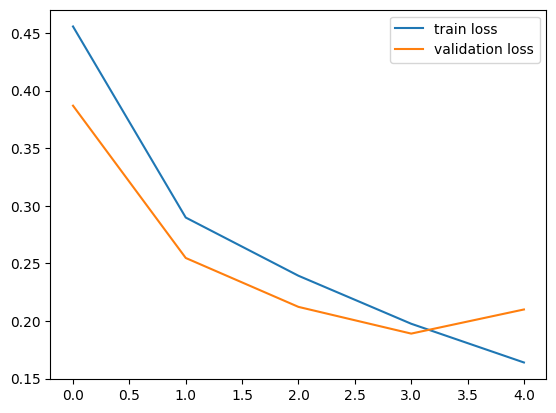

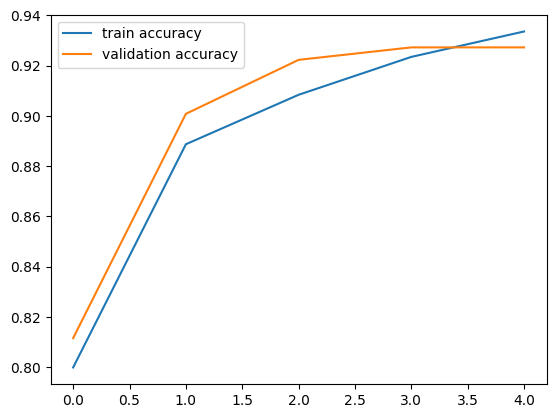

In [43]:
h = history

#plot the loss value

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

#plot the accuracy value

plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

In [1]:
input_image_path = input('Path of the image to be predicted:')
input_image = cv2.imread(input_image_path)
#cv2.imshow("Image provided",input_image)

input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshape = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshape)
print(input_prediction)

input_prediction_label = np.argmax(input_prediction)
print(input_prediction_label)

if input_prediction_label:
    print("The person is wearing a mask.")
else:
    print("The person is not wearing the mask.")

NameError: name 'cv2' is not defined